# Solutions notebook

# Setup


In [25]:
!pip install qiskit --quiet
!pip install qiskit[visualization] --quiet
!pip install qiskit_aer --quiet

In [26]:
import qiskit
print(qiskit.__version__)


2.1.0


## Question 1
**What is the output of the following circuit given the initial state $| 0 \rangle$ ?**

<img src="Photos/q1_circuit.png" align = "left" width="200"/>

**a)** $| 0 \rangle$

**b)** $\frac{| 0 \rangle + | 1 \rangle}{\sqrt{2}}$

**c)** -$\frac{| 0 \rangle - | 1 \rangle}{\sqrt{2}}$

**d)** Both 2 & 3 are possible

**e)** None of the above

## Answer 1

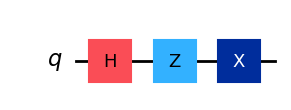

In [27]:
from qiskit import QuantumCircuit
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.z(0)
qc1.x(0)
qc1.draw('mpl')

In [28]:
from qiskit_aer import Aer
from qiskit.visualization import array_to_latex

backend = Aer.get_backend('statevector_simulator') # the device to run on
result = backend.run(qc1).result()
psi = result.get_statevector(qc1)
array_to_latex(psi)

<IPython.core.display.Latex object>

**The answer for Question 1 is option c**

## Question 2

**What is the output of the last Bell state ( $| \psi^{11} \rangle$) followed by an S gate on qubit 0?** 


**a)** $\frac{i| 01 \rangle - | 10 \rangle}{\sqrt{2}}$

**b)** $\frac{| 01 \rangle - | 10 \rangle}{\sqrt{2}}$

**c)** $\frac{i| 01 \rangle + | 10 \rangle}{\sqrt{2}}$

**d)** $\frac{| 01 \rangle + | 10 \rangle}{\sqrt{2}}$

**e)** None of the above

## Answer 2

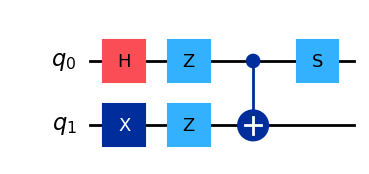

In [29]:

qc2 = QuantumCircuit(2)
qc2.h(0)
qc2.x(1)
qc2.z(0)
qc2.z(1)
qc2.cx(0,1)
qc2.s(0)
qc2.draw('mpl')

In [30]:
backend_example = Aer.get_backend('statevector_simulator') # the device to run on
result = backend.run(qc2).result()
psi = result.get_statevector(qc2)
array_to_latex(psi)

<IPython.core.display.Latex object>

**The answer for Question 2 is option a**

## Question 3

**Consider the three-qubit quantum circuit below. What are the real and imaginary components of the state vector?** 

<img src="Photos/q3_circuit.png" align = "left" width="300"/>

**1)** <img src="Photos/q3_a1.png" width="800"/>

**2)** <img src="Photos/q3_a2.png" width = "800"/>

**3)** <img src="Photos/q3_a3.png" width = "800"/>

**4)** <img src="Photos/q3_a4.png" width = "800"/>

**5)** None of the above

## Answer 3 

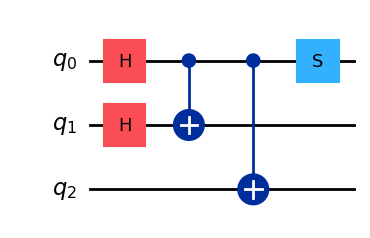

In [31]:
qc3 = QuantumCircuit(3)
qc3.h(0)
qc3.h(1)
qc3.cx(0, 1)
qc3.cx(0, 2)
qc3.s(0)
qc3.draw('mpl')

In [32]:
backend3 = Aer.get_backend('statevector_simulator') # the device to run on
result3 = backend3.run(qc3).result()
psi3 = result3.get_statevector(qc3)
array_to_latex(psi3)

<IPython.core.display.Latex object>

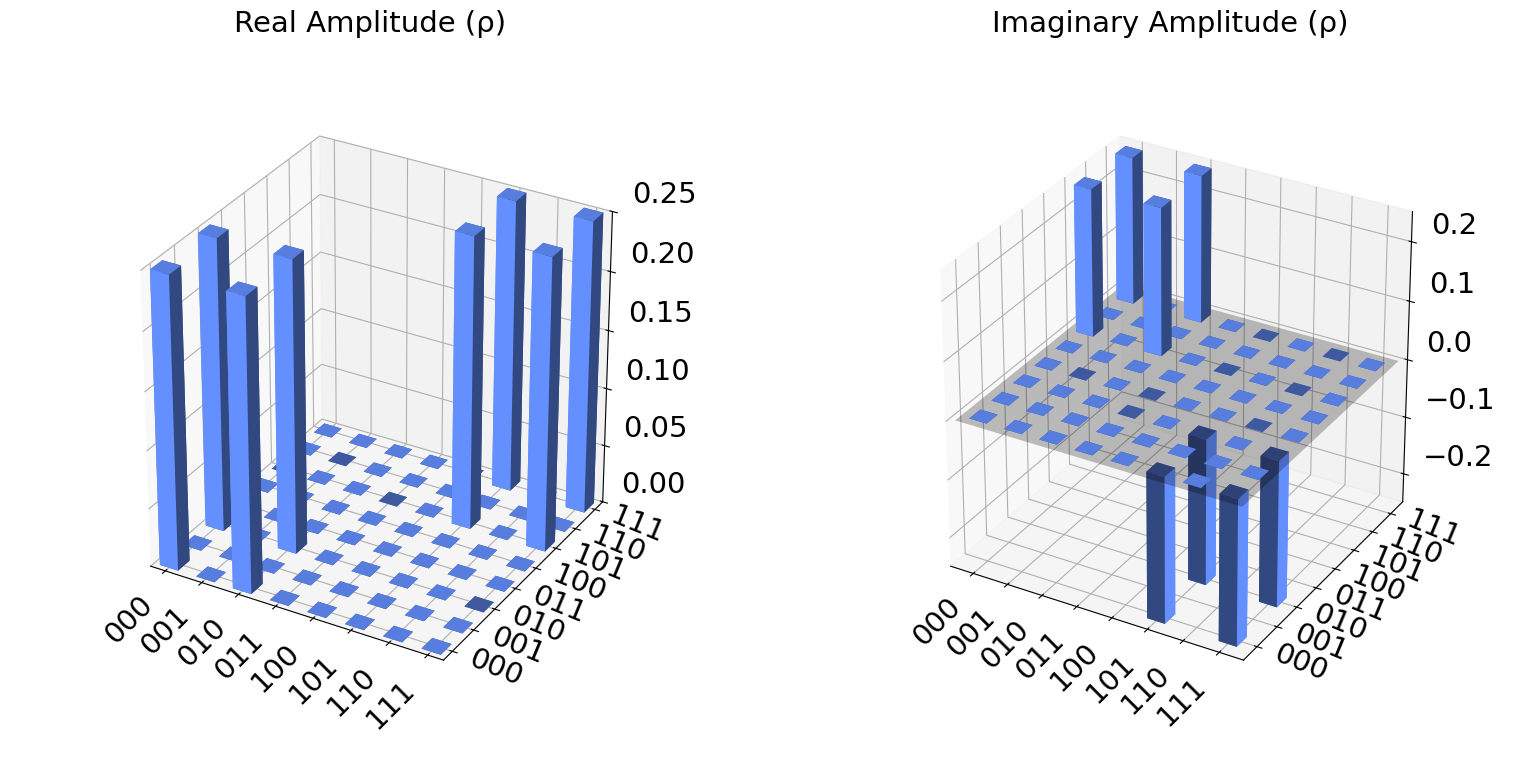

In [33]:
from qiskit.visualization import plot_state_city
plot_state_city(psi3)

**The answer for Question 3 is option c**

## Question 4

**What is the result of the measurements in the following circuit assuming error-free quantum computation?** 

<img src="Photos/q4_circuit.png" align = "left" width="400"/>

**a)** 50% 000 and 50% 111

**b)** 12.5% for all 8 states

**c)** 25% 000,   25% 001,   25% 110,   25% 111

**d)** 100% 000

**e)** 25% 000,   25% 011,   25% 100,   25% 111

## Answer 4

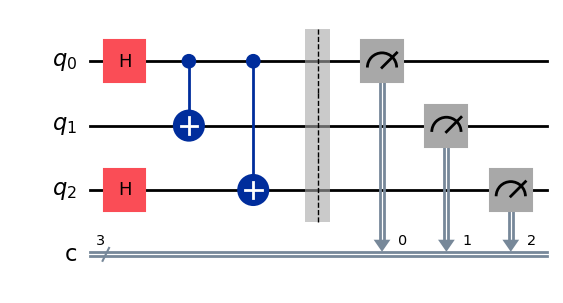

In [34]:
qc4 = QuantumCircuit(3,3)
qc4.h(0)
qc4.h(2)
qc4.cx(0, 1)
qc4.cx(0, 2)
qc4.barrier()
qc4.measure(range(3), range(3))
qc4.draw('mpl')

{'111': 505, '011': 471, '100': 501, '000': 523}


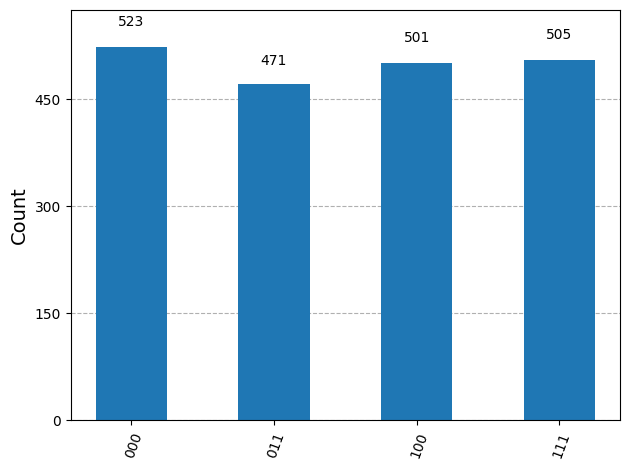

In [35]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('aer_simulator')  # this is the simulator we'll use
job = backend.run(qc4, shots = 2000) # this runs the experiment

result = job.result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

**The answer for Question 4 is option e**

## Question 5

**Noise Simulation in Quantum Circuits**

Quantum computers are subject to noise, which can affect the outcome of computations. Qiskit allows you to simulate noise using built-in noise models.

**Task:**  
Create a single-qubit circuit that applies a Hadamard gate to a qubit initialized in $|0\rangle$, then measures the qubit.  
1. Run the circuit on the ideal simulator (`Aer.get_backend('aer_simulator')`) and plot the measurement histogram.
2. Run the same circuit on a noisy simulator using an **amplitude damping noise model** (you can use `qiskit_aer.noise.NoiseModel` and `qiskit_aer.noise.amplitude_damping_error`).
3. Compare the results. How does the measurement histogram change due to noise?

*Hint: Amplitude damping simulates energy relaxation (T1 decay), which causes qubits to relax from $|1\rangle$ to $|0\rangle$ over time. See the [Qiskit documentation](https://quantum.cloud.ibm.com/docs/en/guides/build-noise-models) for more details.*

---

**a)** The histogram remains unchanged  
**b)** The histogram shows more randomness due to noise  
**c)** The histogram shows a bias toward $|0\rangle$  
**d)** The histogram shows only $|1\rangle$  
**e)** None of the above

## Answer 5

Ideal simulator counts: {'1': 49933, '0': 50067}


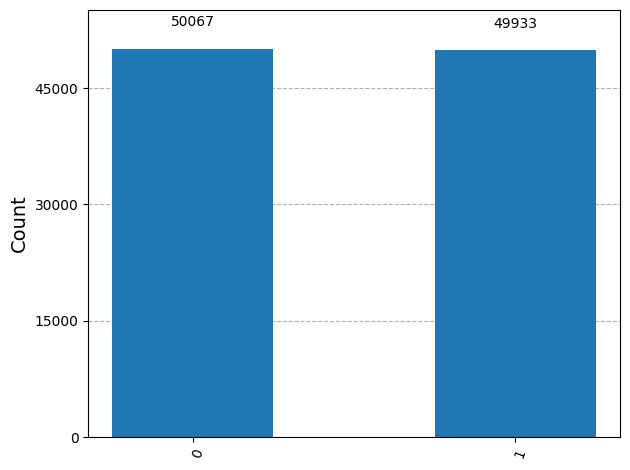

In [36]:

# 1. Ideal simulator
qc_ideal = QuantumCircuit(1, 1)
qc_ideal.h(0)
qc_ideal.measure(0, 0)

backend = Aer.get_backend('aer_simulator')
job_ideal = backend.run(qc_ideal, shots=100_000)
counts_ideal = job_ideal.result().get_counts()
print("Ideal simulator counts:", counts_ideal)
plot_histogram(counts_ideal)

Noisy simulator counts (amplitude damping): {'0': 59432, '1': 40568}


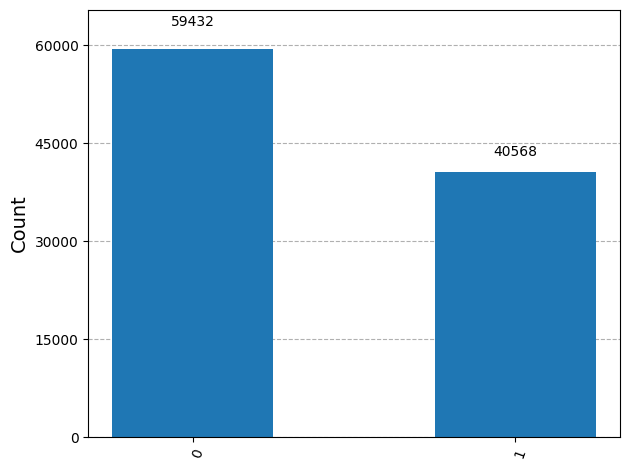

In [37]:
from qiskit_aer.noise import NoiseModel, amplitude_damping_error

# Create a noise model with amplitude damping
noise_model = NoiseModel()
# Amplitude damping with probability p (e.g., p=0.1)
p = 0.1
amp_damp = amplitude_damping_error(p)
noise_model.add_all_qubit_quantum_error(amp_damp, ['h', 'measure'])

# Run the noisy simulation
job_noisy = backend.run(qc_ideal, shots=100_000, noise_model=noise_model)
counts_noisy = job_noisy.result().get_counts()
print("Noisy simulator counts (amplitude damping):", counts_noisy)
plot_histogram(counts_noisy)

**Explanation:**  
- On the ideal simulator, you should see roughly a 50/50 split between `0` and `1` (with small statistical fluctuations due to the finite number of shots).
- With **amplitude damping noise**, the histogram shows a clear **bias toward measuring `0`**. This is because amplitude damping simulates energy relaxation (T1 decay), causing qubits in the $|1\rangle$ state to relax to $|0\rangle$ over time. As a result, the probability of measuring `0` increases compared to the ideal case.
- This effect closely matches what happens in real quantum hardware, where decoherence and relaxation processes naturally drive qubits toward their ground state ($|0\rangle$).

**The answer for Question 5 is option c: The histogram shows a bias toward $|0\rangle$.**

**Note:**  
- With a finite number of shots, the results will not be exactly 50-50 even on the ideal simulator, due to statistical fluctuations. For example, you might see 470 counts for `0` and 530 for `1` out of 1000 shots. This is normal and expected.
- The important point is that, with amplitude damping noise, the distribution becomes **skewed toward `0`**, reflecting the physical process of decoherence in real quantum hardware.

## Question 6

**What is the result of the measurements in the following circuit assuming error-free quantum computation?** 

*Note: You can use for loops to make creating this circuit much easier and efficient

<img src="Photos/q6_circuit.png" align = "left" width="700"/>

**a)** 50% 00000, 11111

**b)** 50% 01111, 10000

**c)** 3.125% for all 32 bits (2^5)

**d)** 100% 00000

**e)** 100% 11111

## Answer 6

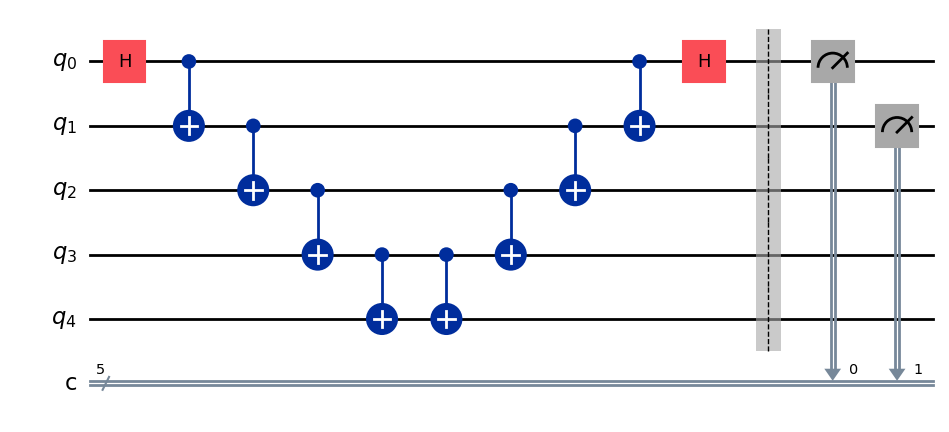

In [38]:
n=5
qc5 = QuantumCircuit(n, n)

qc5.h(0)
for i in range(n-1):
    qc5.cx(i, i+1)

for i in reversed(range(n-1)):
    qc5.cx(i, i+1)
qc5.h(0)
qc5.barrier()
qc5.measure([0,1],[0,1])
qc5.draw('mpl')

{'00000': 2000}


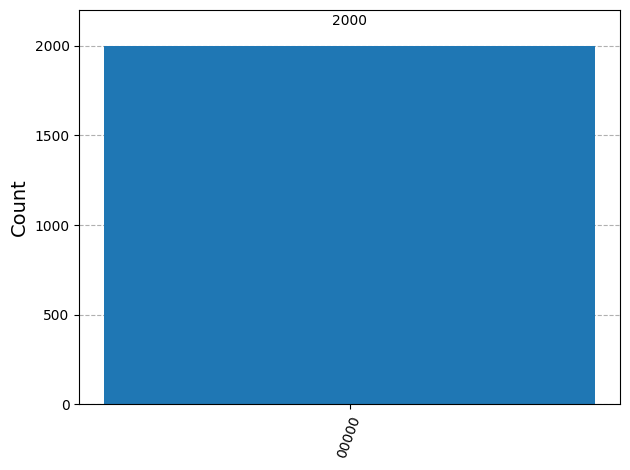

In [39]:
backend = Aer.get_backend('aer_simulator')  # this is the simulator we'll use
job = backend.run(qc5, shots = 2000) # this runs the experiment

result = job.result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

Since all quantum gates are based on unitary matrices, they are reversible. Therefore, in the end, our circuit has no effect.

**The answer for Question 6 is option d**

## Question 7

**How do you merge the lhs and rhs circuits to form the final circuit?** 

<img src="Photos/q7_circuit.png" align = "left" width="700"/>

**a)** `lhs.append(rhs)`

**b)** `lhs.combine(rhs)`

**c)** `lhs.compose(rhs)`

**d)**  `lhs+rhs`

**e)**  None of the above

## Answer 7

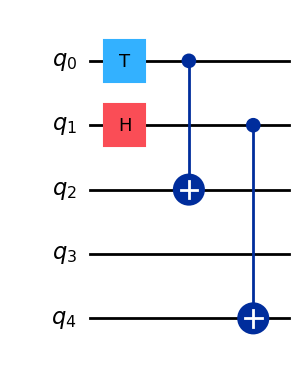

In [40]:
qc6_1 = QuantumCircuit(5)
qc6_1.t(0)
qc6_1.h(1)
qc6_1.cx(0,2)
qc6_1.cx(1,4)
qc6_1.draw('mpl')

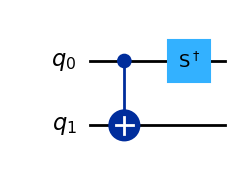

In [41]:
qc6_2 = QuantumCircuit(2)
qc6_2.cx(0,1)
qc6_2.sdg(0)
qc6_2.draw('mpl')

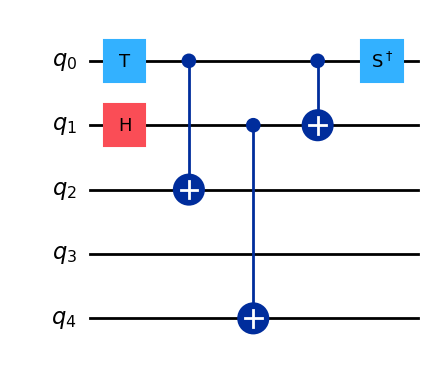

In [42]:
qc6_3 = qc6_1.compose(qc6_2)
qc6_3.draw('mpl')

**The answer for Question 7 is option c**

## Question 8

**How do you retrieve the last run job from a backend?** 

**a)** `backend.jobs()[0]`

**b)** `backend.jobs()[-1]`

**c)** `backend.retrieve_job()[0]`

**d)** `backend.retrieve_job()[-1]`

**e)** None of the above

## Answer 8

**The answer for Question 8 is option a if you are using a real QC backend, otherwise e** 

## Question 9
**Suppose you have a 3-qubit quantum circuit and you apply a Toffoli gate with the first and second qubits as controls and the third qubit as the target. Which of the following is equivalent to the Toffoli gate?**

**1)** H gate on the first qubit, followed by a CX gate on the second and third qubits, followed by a Z gate on the first qubit

**2)** CZ gate on the first and second qubits, followed by a NOT gate on the third qubit

**3)** CX gate on the first and second qubits, followed by a Z gate on the third qubit

**4)** H gate on the first qubit, followed by a CX gate on the first and second qubits, followed by a H gate on the first qubit

**5)** None of the above


## Answer 9

In [52]:

# Create a quantum circuit with 3 qubits
circ = QuantumCircuit(3)

# Apply the Toffoli gate with the first and second qubits as controls and the third qubit as target
circ.ccx(0, 1, 2)

# Apply the equivalent gates for each option
circ_a = QuantumCircuit(3)
circ_a.h(0)
circ_a.cx(1, 2)
circ_a.z(0)

circ_b = QuantumCircuit(3)
circ_b.cz(0, 1)
circ_b.x(2)

circ_c = QuantumCircuit(3)
circ_c.cx(0, 2)
circ_c.z(2)

circ_d = QuantumCircuit(3)
circ_d.h(0)
circ_d.cx(0, 1)
circ_d.h(0)

circuits = [circ, circ_a, circ_b, circ_c, circ_d]

# Choose a backend
backend = Aer.get_backend('statevector_simulator') # the device to run on

# Execute the circuits on the chosen backend
# Get the results of the simulation
result = backend.run(circuits).result()

# Print the statevector of each circuit
for i, circuit in enumerate(circuits):
    statevector = result.get_statevector(circuit)
    print(f'Circuit {i}:')
    display(array_to_latex(statevector))

Circuit 0:


<IPython.core.display.Latex object>

Circuit 1:


<IPython.core.display.Latex object>

Circuit 2:


<IPython.core.display.Latex object>

Circuit 3:


<IPython.core.display.Latex object>

Circuit 4:


<IPython.core.display.Latex object>

**The answer for Question 9 is option c**

## Question 10

**Write a program from scratch that creates the GHZ state (on three qubits),**

$$
|GHZ\rangle = \frac{1}{\sqrt{2}} (|000\rangle + |111\rangle)
$$

**performs a measurement with 2000 shots, and returns the measurement results as a histogram.**

**What should you expect to see in the measurement histogram for the GHZ state?**

**a)** Only the outcome `000` appears.

**b)** Only the outcome `111` appears.

**c)** Both `000` and `111` appear with roughly equal probability.

**d)** All possible 3-bit outcomes appear with equal probability.

**e)** The outcome `001` appears most frequently.

## Answer 10

To create a GHZ state on three qubits, you can use the following steps:
1. Apply a Hadamard gate to the first qubit to create superposition.
2. Apply a CNOT gate from qubit 0 to qubit 1.
3. Apply a CNOT gate from qubit 0 to qubit 2.
4. Measure all qubits.

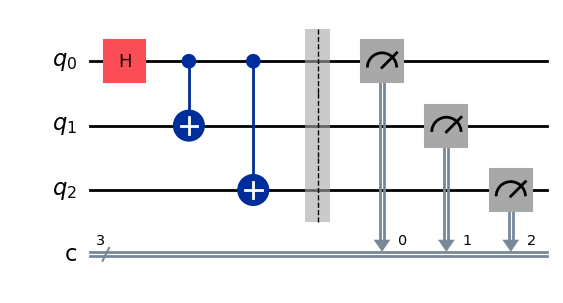

In [44]:
# Create the GHZ circuit
qc_ghz = QuantumCircuit(3, 3)
qc_ghz.h(0)
qc_ghz.cx(0, 1)
qc_ghz.cx(0, 2)
qc_ghz.barrier()
qc_ghz.measure([0, 1, 2], [0, 1, 2])
qc_ghz.draw('mpl')


{'000': 987, '111': 1013}


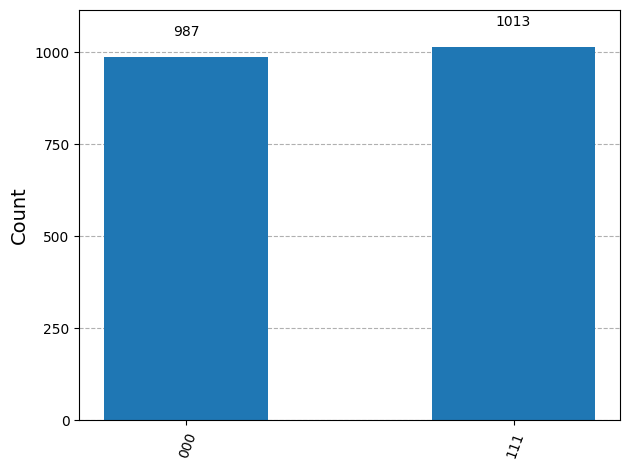

In [45]:
# Run the circuit
backend = Aer.get_backend('aer_simulator')
job = backend.run(qc_ghz, shots=2000)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

**Expected result:**  
You should see that only the outcomes `000` and `111` appear in the histogram, each with roughly equal probability (about 1000 counts each out of 2000 shots). All other outcomes should have zero or near-zero counts. The GHZ (Greenberger–Horne–Zeilinger) state is a famous example of a maximally entangled state involving three or more qubits.

**The answer is option c: Both `000` and `111` appear with roughly equal probability.**